In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from astropy.table import Table as Tb
%matplotlib notebook

In [10]:
from scipy import stats

In [11]:
with open('Sample_0701222022-07-18 13.32.51.561_A0000 test.csv') as f:
    df = pd.read_csv(f)
df

,Protocol Time Stamp(s),Data channel 1 (µm),Data channel 2 (µm),State channel 1
0,2022-07-18 13:32:51.537585,1854.61997,606.38562,0
1,2022-07-18 13:32:51.547185,1854.61997,606.38562,0
2,2022-07-18 13:32:51.556785,1854.62057,606.38312,0
3,2022-07-18 13:32:51.566385,1854.62057,606.38312,0
4,2022-07-18 13:32:51.575985,1854.61938,606.38336,0
...,...,...,...,...
397938,2022-07-18 14:36:31.735249,1834.34104,586.91326,0
397939,2022-07-18 14:36:31.744849,1834.34104,586.91326,0
397940,2022-07-18 14:36:31.754449,1834.34080,586.91219,0
397941,2022-07-18 14:36:31.764049,1834.34032,586.91219,0


In [12]:
time = pd.to_datetime(df["Protocol Time Stamp(s)"])

In [13]:
deltaTime = time - time[0]

<IPython.core.display.Javascript object>


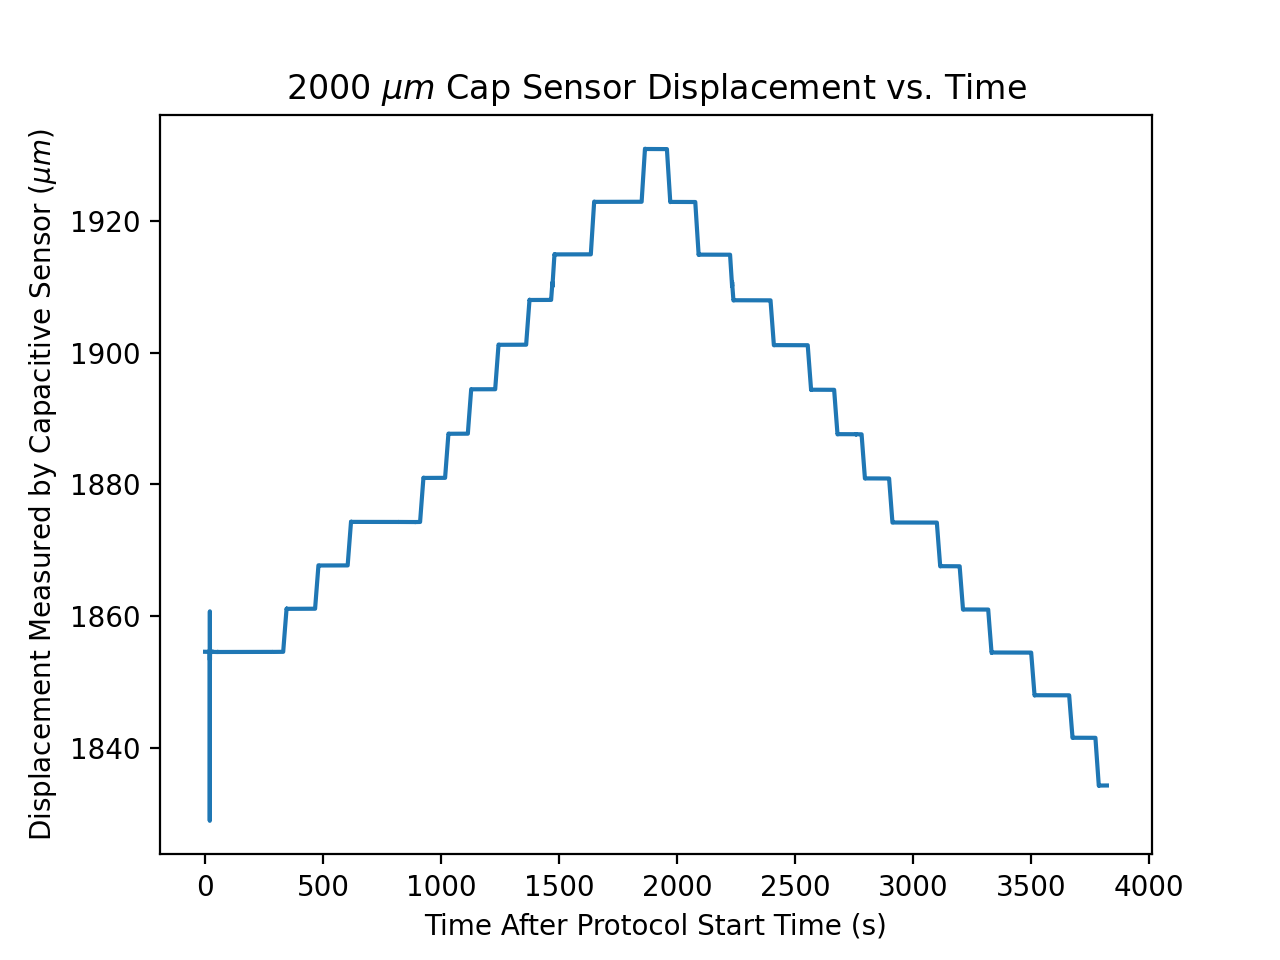

Text(0.5, 1.0, '2000 $\\mu m$ Cap Sensor Displacement vs. Time')

In [14]:
plt.figure()
plt.plot(deltaTime.dt.total_seconds(),df[" Data channel 1 (µm)"])

plt.xlabel('Time After Protocol Start Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('2000 $\mu m$ Cap Sensor Displacement vs. Time')

<IPython.core.display.Javascript object>


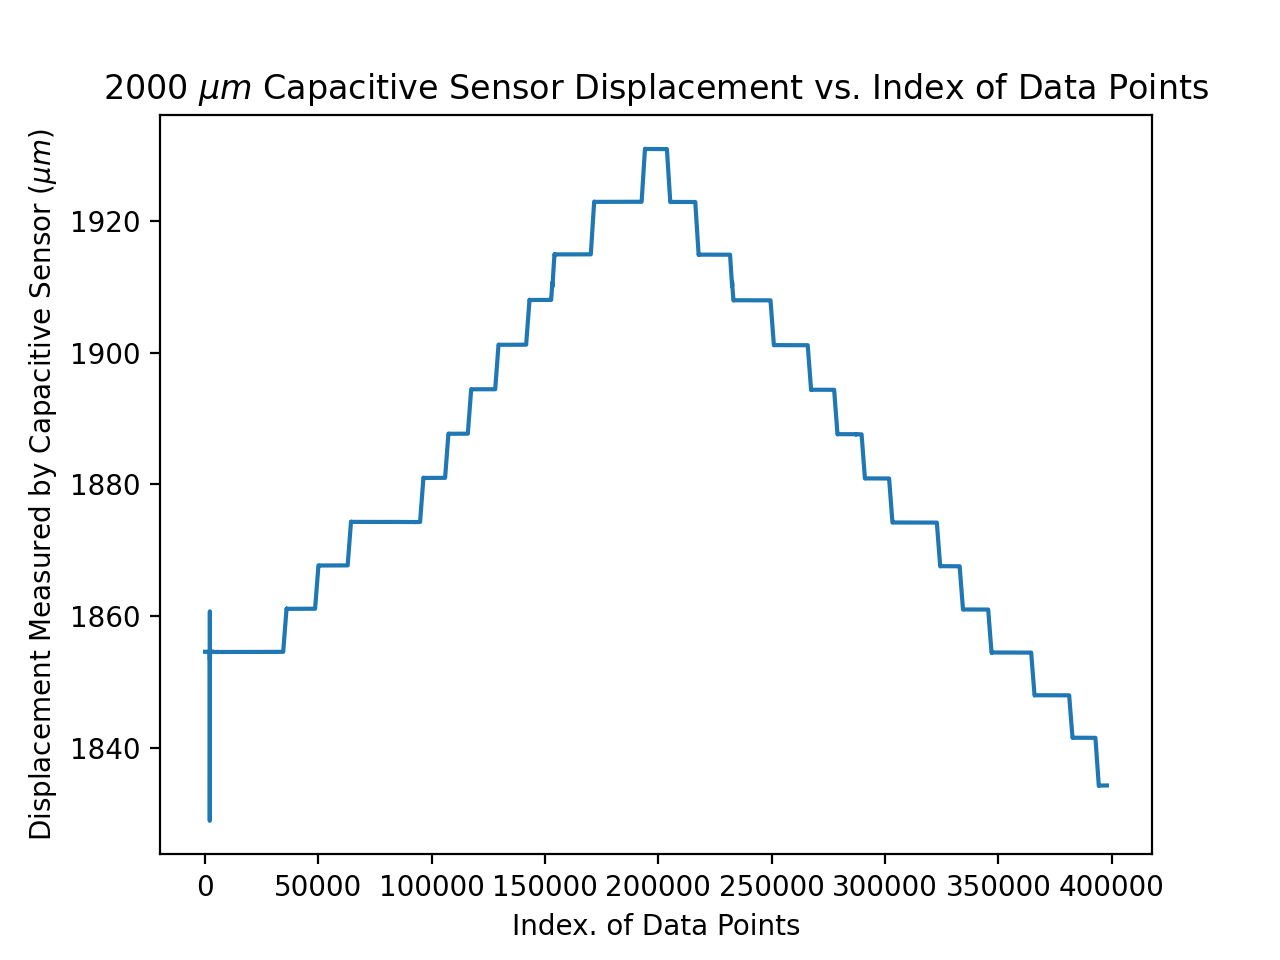

Text(0.5, 1.0, '2000 $\\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [15]:
plt.figure()
plt.plot(df[" Data channel 1 (µm)"])

plt.xlabel('Index. of Data Points')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('2000 $\mu m$ Capacitive Sensor Displacement vs. Index of Data Points')

In [16]:
start=65000
end=82500

In [17]:
print(df[" Data channel 1 (µm)"][start:end].mean())
print(df[" Data channel 1 (µm)"][start:end].std())

1874.314400703432
0.003754667093218749


In [18]:
y = df[" Data channel 1 (µm)"][start:end]
x = (time[start:end] - time[start]).dt.total_seconds()

In [19]:
info = stats.linregress(x,y)
info

LinregressResult(slope=-3.804936836826419e-05, intercept=1874.3175966617973, rvalue=-0.49148049306560504, pvalue=0.0, stderr=5.096940429187239e-07, intercept_stderr=4.9435484487622645e-05)

<IPython.core.display.Javascript object>


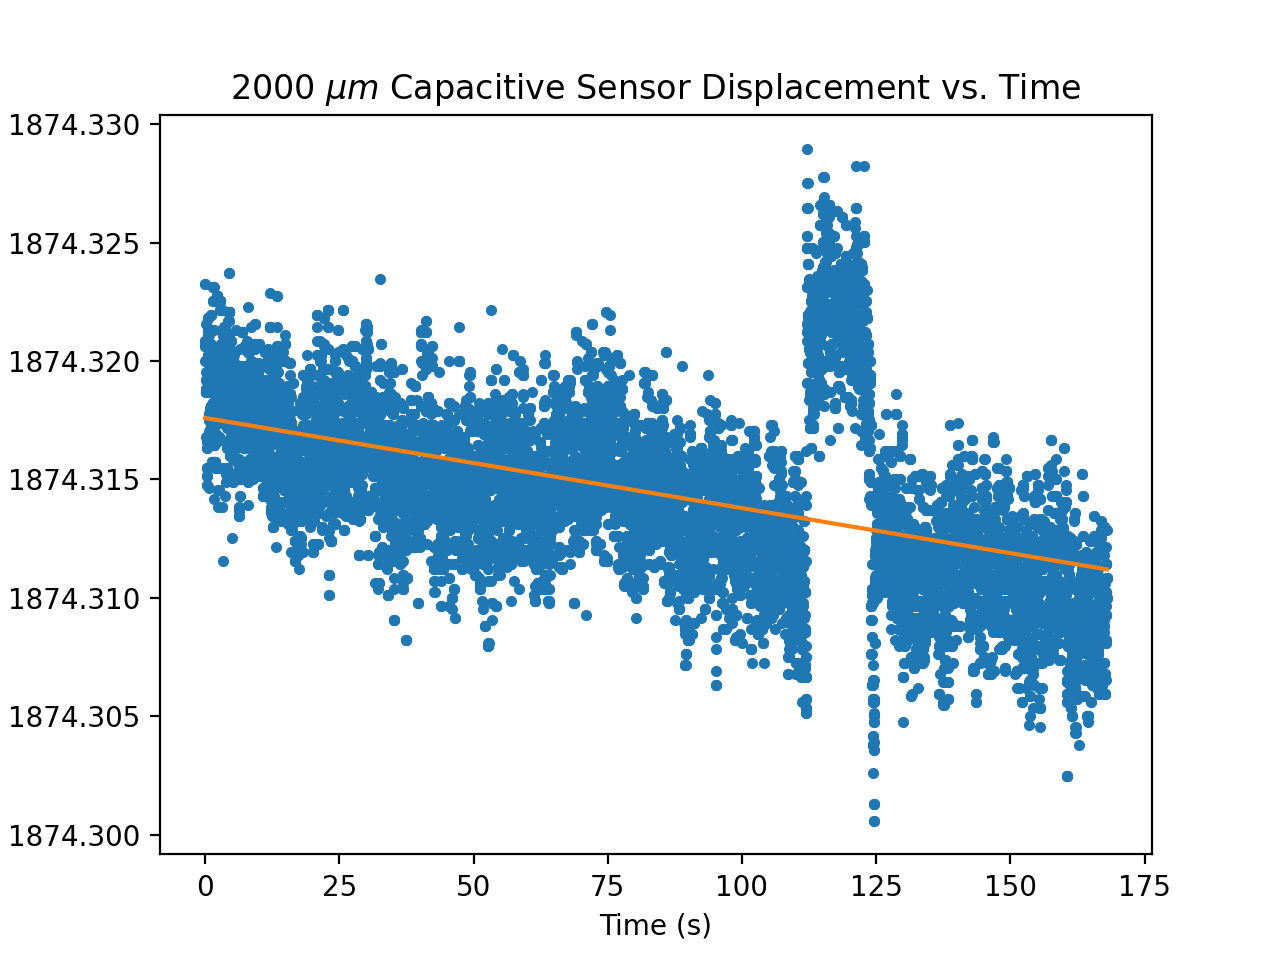

In [20]:
plt.figure()
plt.plot((time[start:end] - time[start]).dt.total_seconds(),df[" Data channel 1 (µm)"][start:end],".")
plt.plot(x,x*info.slope+info.intercept)

plt.xlabel('Time (s)')
plt.ylabel('Displacement Measured by Capacitive Sensor $(\mu m)$')
plt.title('2000 $\mu m$ Capacitive Sensor Displacement vs. Time')

plt.ticklabel_format(useOffset=False)